# Mini Project: Exploratory Data Analysis

# Exploratory Data Analysis: Unveiling Insights from the NYC Taxi Dataset

Data has become the lifeblood of the modern world, permeating every aspect of our lives and transforming the way we make decisions. In this era of vast information, the ability to extract meaningful insights from raw data has emerged as a crucial skill. Enter exploratory data analysis (EDA), a powerful approach that allows us to unravel hidden patterns, detect anomalies, and generate valuable knowledge from the vast volumes of data at our disposal.

Exploratory data analysis serves as the initial step in any data-driven investigation, offering a comprehensive understanding of the dataset's structure, distributions, and relationships between variables. By applying statistical and visual techniques, analysts gain a deeper insight into the data, paving the way for more accurate predictions, informed decision-making, and the discovery of actionable insights.

To illustrate the significance of exploratory data analysis, we delve into one of the most popular and widely studied datasets in the field—the [NYC Taxi Dataset](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). As the name suggests, this dataset captures detailed information about taxi trips within the bustling city of New York. The NYC Taxi Dataset is an ideal choice for learning and practicing EDA techniques due to its richness, complexity, and real-world applicability.

The dataset encompasses a vast range of attributes, including pickup and drop-off locations, timestamps, trip durations, passenger counts, payment information, and much more. By exploring this data, we can gain valuable insights into the dynamics of taxi usage, understand travel patterns across different neighborhoods, identify peak hours of demand, analyze fare structures, and even uncover interesting anecdotes about the city's vibrant life.

The NYC Taxi Dataset is an excellent resource for aspiring ML practitioners to develop their EDA skills. Its scale, complexity, and real-world relevance make it an engaging playground for uncovering hidden patterns, generating hypotheses, and forming data-driven narratives.

In this mini project, we will dive deep into the NYC Taxi Dataset. We will leverage various EDA techniques to unveil meaningful insights, visualize data distributions, identify outliers, and pose insightful questions that will fuel further analysis and exploration. By the end of this colab, students will have a solid foundation in exploratory data analysis and be equipped to tackle real-world data challenges with confidence.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the NYC taxi dataset into a Pandas DataFrame and do a few basic checks to ensure the data is loaded properly. Note, there are several months of data that can be used. For simplicity, use the Yellow Taxi 2022-01 parquet file [here](https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet). Here are your tasks:

  1. Load the `yellow_tripdata_2022-01.parquet` file into Pandas.
  2. Print the first 5 rows of data. Study the schema and make sure you understand what each of the fields mean by referencing the [documentation](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf).
  3. How many rows are in the dataset? How many unique columns are in the dataset?
  4. Which columns have NULL values and how many NULL values are present in each of these columns?
  5. Generate summary statistics using Pandas' [describe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html). Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.  
  6. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.


**Describe Method**
DataFrame.describe(percentiles=None, include=None, exclude=None)

**Questions (3):**

----
1. *How many rows are in the dataset? How many unique columns are in the dataset?*
2. *Which columns have NULL values and how many NULL values are present in each of these columns?*
3. *Do you notice anything unusual in the dataset?*

In [27]:
# Load parquet file into a Pandas DataFrame
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet')

In [4]:
# Display the first few rows of the dataset
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [5]:
# Display the shape of the dataset
print(df.shape)

(2463931, 19)


**1. How many rows are in the dataset? How many unique columns are in the dataset?**

----
**Answer:** There are 2,463,931 rows in this dataset and there are 19 unique columns.

----


In [6]:
# Check for missing values
# df.isnull()
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,71503
trip_distance,0
RatecodeID,71503
store_and_fwd_flag,71503
PULocationID,0
DOLocationID,0
payment_type,0


**2. Which columns have NULL values and how many NULL values are present in each of these columns?**

----
**Answer:** The columns where null values are found are: passenger_count, RatecodeID, store_and_forward_flag, congestion_surcharge, and airport_fee.

We see that for all columns where data is missing, they all have 71,503 missing fields.

----

In [7]:
# Summary statistics of the dataset
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01


**3. Do you notice anything unusual in the dataset?** *Find at least one anomoly and try to come up with a hypothesis to explain it.*

----
**Answer:**
One thing to note is that some of they payment fields contain a negative balance. It does not make sense for there to be zero or negative charges as we can see in the min row above. A **hypothesis** for this is: these fields might also contain refunds amounts and cancellation fees. A cancellation fee added to this column would explain why payments would result in zero and a refund would explain all the fees where the customer was returned money instead of the taxi service making money.

Another thing to note is that the timestamps have an abnormal timespan. Most of the data is coming from 2022 as seen in the different quartiles under timedate columns. However, the the min field for the timedate columns shows that data from 2008 is included in this list. A **hypothesis** for this is: that this could be due to historical data inclusion. When migrating data, some of the historical information might not have been properly removed in these columns. Therefore, historical data will appear alongside new data as we see above.

One final inconsistency to note is that the max field for the fare_amount is 4.010923e+05. This is means that $401,092.30 was the price of one taxi ride. This will lead us to conclude that outliers might be located in the data. A **hypothesis** for this is: the data entries contain typing errors inside. Either the cab driver inserted the wrong amount or something happened inside the system when these outliers are significant. We will need to watch for skewed data in the charts to see if outliers are present.

-----


In [28]:
# Drop rows with missing values.
df.dropna(inplace=True)
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

Feature engineering is a critical process in machine learning that involves selecting, transforming, and creating features from raw data to improve the performance and accuracy of predictive models. While machine learning algorithms have the capability to automatically learn patterns from data, the quality and relevance of the features used as inputs greatly influence the model's ability to generalize and make accurate predictions. Feature engineering, therefore, plays a crucial role in extracting meaningful information and representing it in a format that best captures the underlying relationships within the data.

Here are your tasks:

  1. Create a new feature that calculates the trip duration in minutes.
  2. Create additional features for the pick-up day of week and pick-up hour.
  3. Use the Seaborn library to create a [line plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) depicting the number of trips as a function of the hour of day. What's the busiest time of day?
  4. Create another lineplot depicting the number of trips as a function of the day of week. What day of the week is the least busy?

**Questions(2):**

4. *What's the busiest time of day?*
5. *What day of the week is the least busy?*

In [37]:
# Create a new column for trip duration in minutes
df['trip_duration_mins'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
print(df['trip_duration_mins'].head(10) )

0    17.816667
1     8.400000
2     8.966667
3    10.033333
4    37.533333
5    29.550000
6    14.133333
7     9.683333
8    14.783333
9     4.600000
Name: trip_duration, dtype: float64


In [71]:
# Create new columns for pickup hour and day of week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
print(df[['pickup_hour', 'pickup_day_of_week']].head(20))
print(df[['pickup_hour', 'pickup_day_of_week', 'tpep_pickup_datetime']])





    pickup_hour  pickup_day_of_week
0             0                   5
1             0                   5
2             0                   5
3             0                   5
4             0                   5
5             0                   5
6             0                   5
7             0                   5
8             0                   5
9             0                   5
10            0                   5
11            0                   5
12            0                   5
13            0                   5
14            0                   5
15            0                   5
16            0                   5
17            0                   5
18            0                   5
19            0                   5
         pickup_hour  pickup_day_of_week tpep_pickup_datetime
0                  0                   5  2022-01-01 00:35:40
1                  0                   5  2022-01-01 00:33:43
2                  0                   5  2022-01-01 00:53

In [70]:
# Show my work to compare to graphs below:
num_unique = df['pickup_hour'].nunique()

# List of unique values
unique_values = df['pickup_hour'].unique()

print(f"Number of unique values: {num_unique}")
print(f"Unique values: {unique_values}")

num_unique = df['pickup_day_of_week'].nunique()

counts_hour_df = df['pickup_hour'].value_counts().reset_index()
counts_hour_df.columns = ['pickup_hour', 'count_hour']
print(counts_hour_df)


# List of unique values
unique_values = df['pickup_day_of_week'].unique()

print(f"Number of unique values: {num_unique}")
print(f"Unique values: {unique_values}")

counts_day_df = df['pickup_day_of_week'].value_counts().reset_index()
counts_day_df.columns = ['pickup_day_of_week', 'count_day']
print(counts_day_df)
print(df['tpep_pickup_datetime'] )


Number of unique values: 24
Unique values: [ 0 18  1 23  2 20  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22]
    pickup_hour  count_hour
0            18      172507
1            17      172256
2            15      170569
3            16      164751
4            14      160138
5            19      147191
6            13      144455
7            12      138788
8            11      126574
9            10      117011
10           20      115050
11           21      106821
12            9      106285
13           22      101478
14            8       97312
15           23       77199
16            7       70223
17            0       57535
18            1       40334
19            6       34149
20            2       27789
21            3       18439
22            5       13608
23            4       11966
Number of unique values: 7
Unique values: [5 4 6 2 0 1 3]
   pickup_day_of_week  count_day
0                   0     363818
1                   5     352417
2                   4     

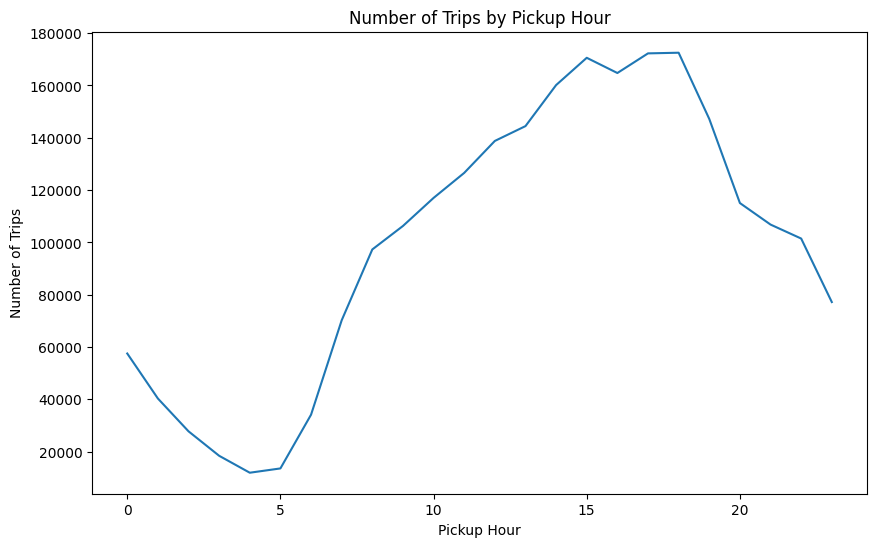

In [66]:
# Create a lineplot displaying the number of trips by pickup hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='count_hour', data=counts_hour_df)
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')

plt.show()

**4. What's the busiest time of day?**

-----
**Answer:** 6PM and 5PM are the busiest times of the day for taxi activity. 6PM is slightly in the lead.

-----


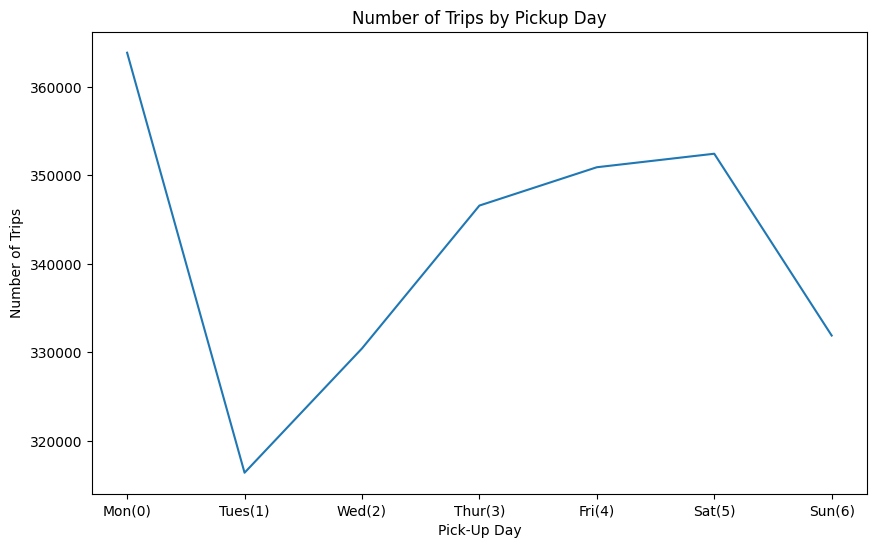

In [72]:
# Create a lineplot displaying the number of trips by pickup day
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_day_of_week', y='count_day', data=counts_day_df)
plt.title('Number of Trips by Pickup Day')
plt.xlabel('Pick-Up Day')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(len(counts_day_df)), labels=['Mon(0)', 'Tues(1)', 'Wed(2)', 'Thur(3)', 'Fri(4)', 'Sat(5)', 'Sun(6)'])
plt.show()

**5. What day of the week is the least busy?**

-----
Answer: The least busy day of the week would be Day 1, which is Tuesday.

Looking back at the data 01/01/22 is Day 5 and located on a Saturday. Therefore, Day 0 would be a Monday and Day 1 would be a Tuesday.

-----

In the realm of machine learning, understanding the relationships between variables is crucial for building accurate and effective predictive models. One powerful tool for exploring these relationships is the correlation matrix. A correlation matrix provides a comprehensive overview of the pairwise correlations between variables in a dataset, allowing practitioners to quantify and visualize the strength and direction of these associations. This matrix is an essential component of exploratory data analysis and offers several key benefits:

1. Relationship Assessment: The correlation matrix provides a quantitative measure of the relationship between variables. By calculating correlation coefficients, typically using methods like Pearson's correlation coefficient, analysts can determine if variables are positively correlated (increase together), negatively correlated (one increases as the other decreases), or uncorrelated (no systematic relationship). These measures offer insights into the direction and strength of the relationships, helping to identify important variables that may influence the target variable.

2. Feature Selection: Correlation matrices are invaluable in feature selection, which involves identifying the most relevant variables for building predictive models. By examining the correlations between the target variable and other features, analysts can identify highly correlated variables that may be strong predictors. This knowledge enables informed decisions regarding which variables to include in the model, potentially reducing dimensionality, enhancing model efficiency, and preventing issues such as multicollinearity.

3. Multicollinearity Detection: Multicollinearity occurs when two or more independent variables in a model are highly correlated. This can lead to problems such as instability in coefficient estimates, difficulty in interpreting feature importance, and reduced model robustness. By examining the correlation matrix, analysts can identify highly correlated variables and make informed decisions about which ones to include or exclude to mitigate multicollinearity. Removing redundant variables improves model interpretability and generalization.

Here is your task:

  1. Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?

**Questions (1):**

-----
6. *Which variables are strongly correlated?*

               trip_distance  fare_amount  tip_amount  total_amount  \
trip_distance       1.000000     0.039426    0.491978      0.048724   
fare_amount         0.039426     1.000000    0.024196      0.999878   
tip_amount          0.491978     0.024196    1.000000      0.038133   
total_amount        0.048724     0.999878    0.038133      1.000000   
trip_duration       0.165854     0.008134    0.086206      0.009720   

               trip_duration  
trip_distance       0.165854  
fare_amount         0.008134  
tip_amount          0.086206  
total_amount        0.009720  
trip_duration       1.000000  


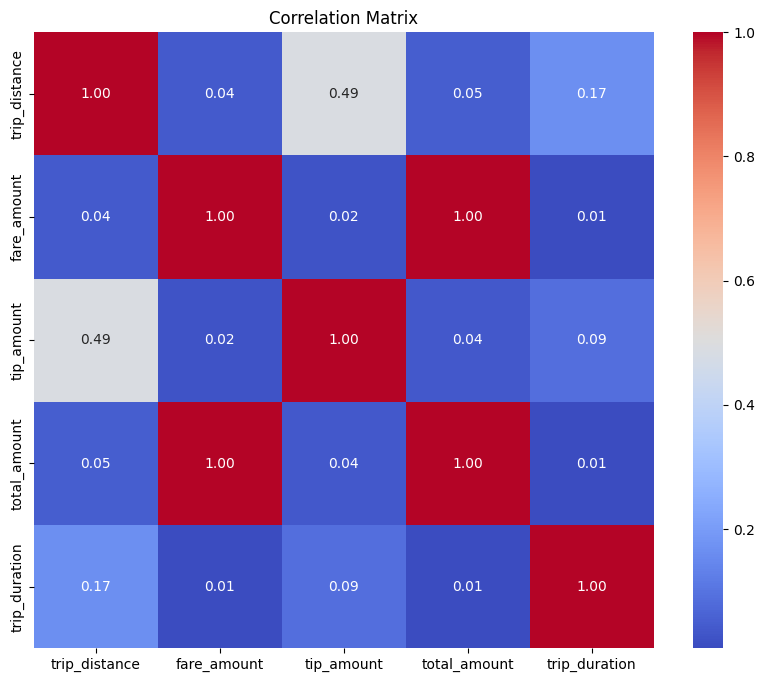

In [13]:
# Compute correlation matrix of numerical variables
corr_matrix = df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']].corr()
print(corr_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**6. Which variables are strongly correlated?**

-----
**Answer:** From the above chart, we can conclude that the variables: fare_amount and total_amount are strongly correlated. We can see that they have a close to 1 to 1 relationship.

Pairplots, also known as scatterplot matrices, allow for the visualization of pairwise relationships between multiple variables simultaneously. Each subplot in the pairplot represents the scatterplot of one variable against another. Pairplots offer several advantages in EDA:

  - Variable Relationships: Pairplots enable analysts to explore the relationships between variables, revealing patterns such as linear or nonlinear correlations, clusters, or other associations. These visual cues guide further analysis, feature selection, or modeling decisions.

  - Multivariate Analysis: Pairplots help identify multivariate dependencies and interactions, highlighting how different variables jointly influence one another. This is particularly valuable in identifying potential confounding factors or discovering hidden interactions that may not be apparent when considering variables in isolation.

  - Outlier Detection: Pairplots can reveal potential outliers by showing data points that deviate significantly from the general pattern observed between variables. Outliers can indicate data anomalies or influential observations that may impact model performance.

  - Feature Importance: Pairplots provide an intuitive representation of the relative importance of different features. Variables exhibiting strong correlations or clear patterns may be more relevant for predictive modeling or feature selection.

  - Data Quality: Pairplots can help identify data quality issues, such as data entry errors or measurement inconsistencies. Patterns that do not align with expectations or exhibit unusual trends may signal data problems that require further investigation or preprocessing.

Here is your task:

  1. Create a [pairplot matrix](https://seaborn.pydata.org/generated/seaborn.pairplot.html) using Seaborn to observation the relationship between the following variables: trip_distance, fare_amount, tip_amount, total_amount, trip_duration. Note, pairplots can be memory intensive. Try sampling the dataset using the [sample method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) in Pandas. Which variables appear to have a strong relationship? Which variables seem to have no relationship?

Questions(2):
7. *Which variables appear to have a strong relationship?*
8. *Which variables seem to have no relationship?*

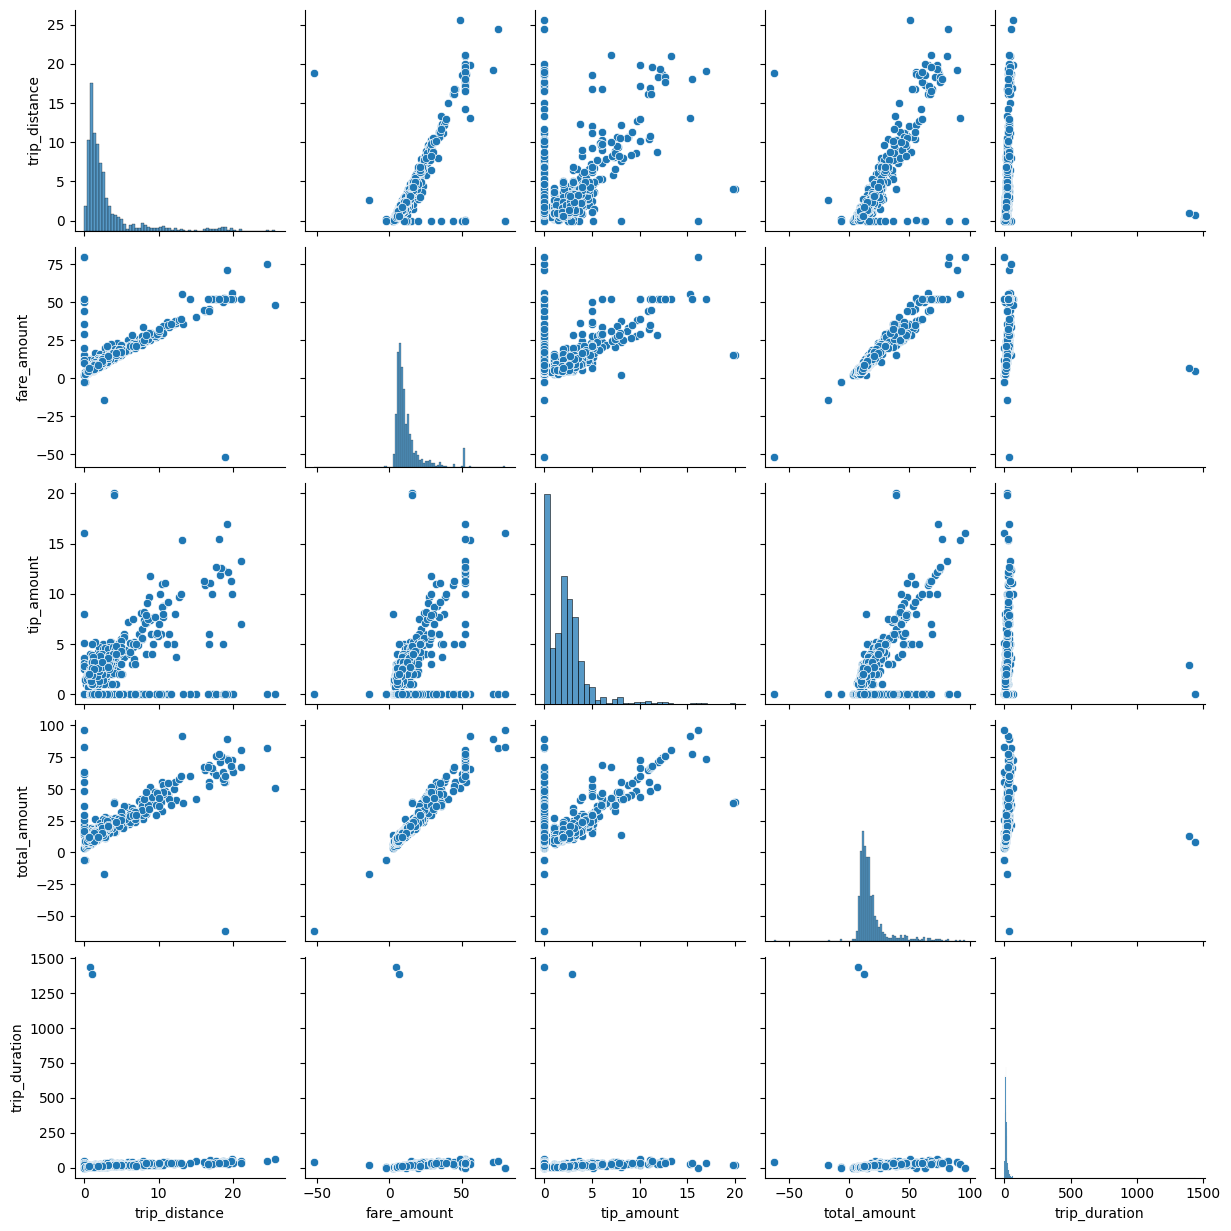

In [14]:
# Create a scatter plot matrix of numerical variables. If memory issues try the df.sample method.
sns.pairplot(df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']].sample(1000))

**7. Which variables appear to have a strong relationship?**

----
**Answer:**
Variables that appear to have a strong relationship include: fare_amount and total_amount. You can see they have moderate to high corellation above.


**8. Which variables seem to have no relationship**

----
**Answer:** Variables that appear to have no relationship include:
*   total_amount and trip_duration
*   fare_amount and trip_duration
*   trip_distance and trip_duration
*   tip_amount and trip_distance
*   tip_amount and trip_duration

-----


A count plot is a type of categorical plot that displays the number of occurrences of each category in a dataset. It is particularly useful for visualizing the distribution and frequency of categorical variables. Here are some key uses and benefits of count plots:

  - Categorical Variable Exploration: Count plots provide a quick and concise summary of the distribution of categorical variables. They allow analysts to understand the frequency or count of each category, revealing the proportions and imbalances within the dataset. This information is crucial for gaining insights into the composition and characteristics of categorical variables.

  - Class Imbalance Assessment: In classification tasks, count plots help assess the balance or imbalance of different target classes. It provides a visual representation of the distribution of classes, highlighting any significant discrepancies in the sample sizes across categories. Identifying imbalanced classes is important in machine learning as it can affect model performance and bias the predictions towards the majority class.

  - Data Quality Inspection: Count plots can be utilized to detect data quality issues in categorical variables. It allows analysts to identify unexpected or erroneous categories that may indicate data entry errors, missing data, or inconsistencies in the dataset. By observing the counts for each category, anomalies or discrepancies can be easily spotted, enabling data cleaning or further investigation if necessary.

  - Feature Importance Evaluation: Count plots can provide insights into the importance or relevance of different categorical features in relation to the target variable. By visualizing the distribution of categories within each class or target level, analysts can determine which categories are more prevalent or have higher frequencies for specific outcomes. This understanding helps in assessing the discriminatory power of categorical features and their potential impact on predictive models.

Here is your task:

  1. Use Seaborn to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location?

**Questions(1):**

----
9. *What's the most popular pick-up location?*

seaborn.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)

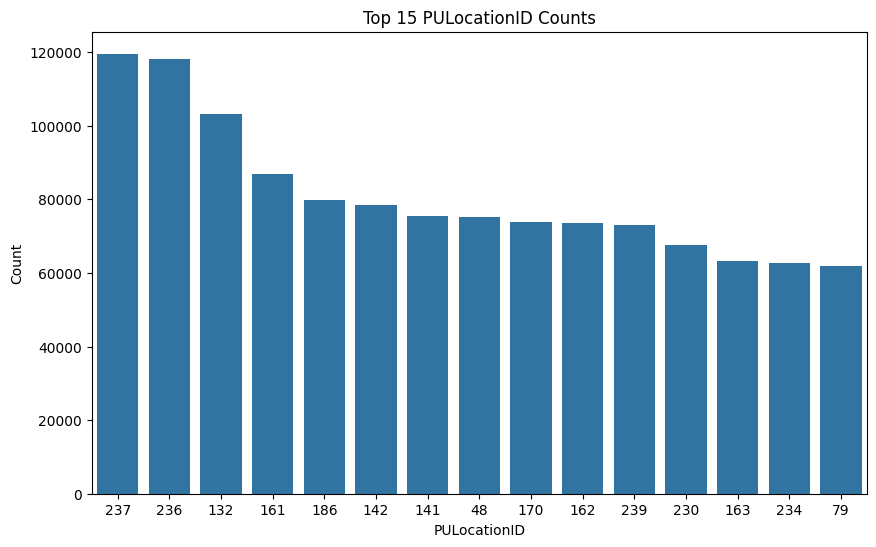

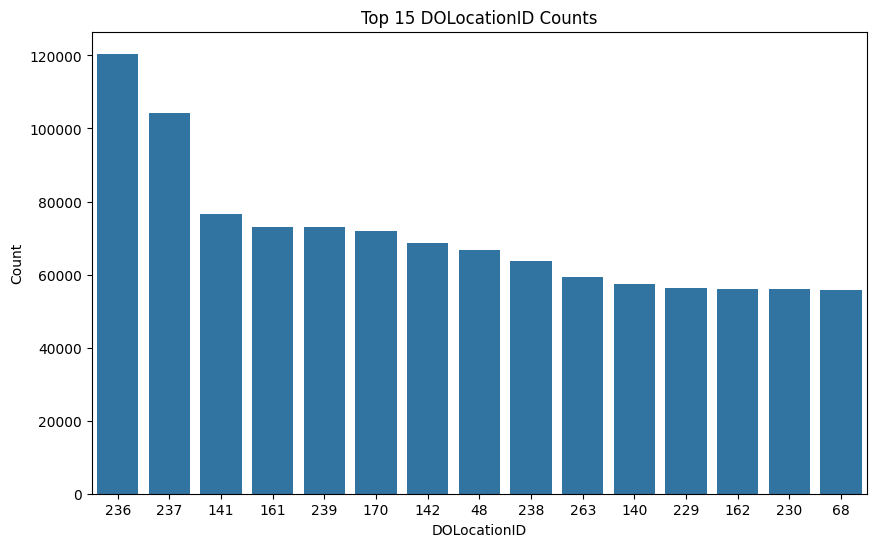

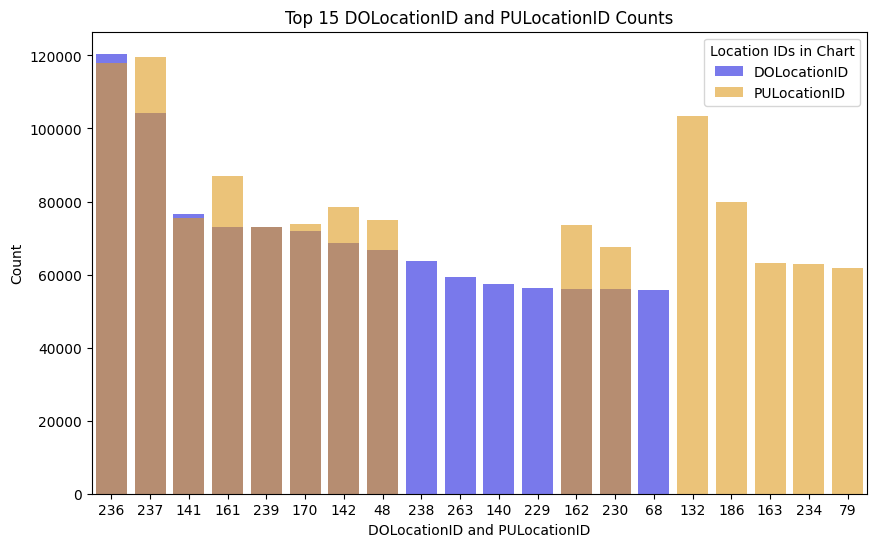

In [15]:
# Create a Seaborn countplot for PULocationID and DOLocationID. Only plot the top 15 categories by value counts.
# sns.countplot(y=df['PULocationID'].value_counts().head(15), data=df)
# sns.countplot(y=df['DOLocationID'].value_counts().head(15), data=df)

# For PULocationID
top_15_pu = df['PULocationID'].value_counts().nlargest(15).index
df_top_pu = df[df['PULocationID'].isin(top_15_pu)]

# For DOLocationID
top_15_do = df['DOLocationID'].value_counts().nlargest(15).index
df_top_do = df[df['DOLocationID'].isin(top_15_do)]

# Plot for PULocationID
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_pu, x='PULocationID', order=top_15_pu)
plt.title('Top 15 PULocationID Counts')
plt.xlabel('PULocationID')
plt.ylabel('Count')
plt.show()

# Plot for DOLocationID
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_do, x='DOLocationID', order=top_15_do)
plt.title('Top 15 DOLocationID Counts')
plt.xlabel('DOLocationID')
plt.ylabel('Count')
plt.show()

# Plot both same chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_do, x='DOLocationID', order=top_15_do, label='DOLocationID',  color='blue', alpha=0.6)
sns.countplot(data=df_top_pu, x='PULocationID', order=top_15_pu, label='PULocationID', color='orange',  alpha=0.6)
plt.legend(title='Location IDs in Chart', loc='upper right')
plt.title('Top 15 DOLocationID and PULocationID Counts')
plt.xlabel('DOLocationID and PULocationID')
plt.ylabel('Count')
plt.show()

**What's the most popular pick-up location?**

----
The most popular pick-up location is 237.
The most popular drop-off location is 236, which is the second most popular pick-up location.

A box plot, also known as a box-and-whisker plot, is a powerful visualization tool for displaying the distribution, variability, and outliers within a numerical dataset. It provides a concise summary of key statistical measures and offers several important uses:

  - Data Distribution and Skewness: Box plots offer a visual representation of the distribution of numerical data, providing insights into its central tendency, spread, and skewness. The box represents the interquartile range (IQR), which contains the middle 50% of the data, with the median indicated by a horizontal line within the box. By observing the length and symmetry of the box, analysts can assess whether the data is skewed or symmetrically distributed.

  - Outlier Detection: Box plots are highly effective in identifying outliers, which are data points that deviate significantly from the rest of the distribution. The whiskers of the plot extend to the minimum and maximum non-outlier values, with any data points beyond the whiskers considered as potential outliers. Outliers can indicate data errors, anomalies, or important observations requiring further investigation.

  - Comparing Groups or Categories: Box plots are useful for comparing the distributions of numerical data across different groups or categories. By creating side-by-side or grouped box plots, analysts can easily compare the central tendencies, spreads, and shapes of distributions between different groups. This allows for the identification of differences, similarities, or patterns within the data.

  - Variability and Spread: Box plots provide insights into the variability and spread of the data. The length of the box indicates the spread of the middle 50% of the data, while the whiskers show the range of non-outlier values. By comparing the lengths of the boxes and whiskers, analysts can assess the relative variability between different groups or categories, aiding in the understanding of the data's dispersion.

  - Skewedness and Symmetry: Box plots offer a visual assessment of the skewness or symmetry of the data distribution. A symmetrical distribution is represented by a box plot with an equal length on both sides of the median, while a skewed distribution is indicated by a longer box on one side. This visual cue helps in understanding the shape and characteristics of the data, assisting in further analysis and modeling decisions.

  - Data Range and Quartiles: Box plots display the quartiles of the data distribution. The lower quartile (Q1) represents the 25th percentile, the upper quartile (Q3) represents the 75th percentile, and the interquartile range (IQR) is the range between Q1 and Q3. These quartiles provide a summary of the range and spread of the central portion of the data, aiding in the understanding of the data's variability and dispersion.

Your task is:

  1. Use Seaborn's [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to discern the relationship between payment_type and total_amount. Does anything look weird? Can you explain what's going on?

In [10]:
# Analyzing the data...Group by 'Type' and sum 'Value'

num_unique = df['payment_type'].nunique()

# List of unique values
unique_values = df['payment_type'].unique()

print(f"Number of unique values: {num_unique}")
print(f"Unique values: {unique_values}")

counts_df = df['payment_type'].value_counts().reset_index()
counts_df.columns = ['payment_type', 'count']
print(counts_df)


df.groupby('payment_type')['total_amount'].sum()


Number of unique values: 5
Unique values: [1 2 4 3 5]
   payment_type    count
0             1  1874874
1             2   495171
2             3    11709
3             4    10673
4             5        1


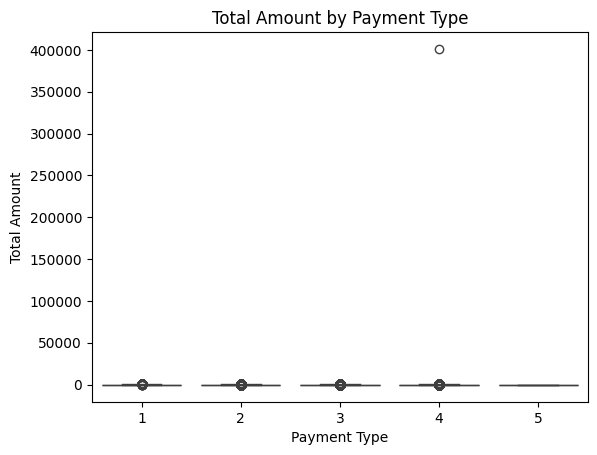

In [13]:
# Create a box plot of total amount by payment type. Do you see anything odd?
sns.boxplot(x='payment_type', y='total_amount', data=df)
plt.title('Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.show()

  **9 Does anything look weird? Can you explain what's going on?**

---

**Answer(Part 1 of 3):**The above payment_types look compressed because there seems to be an outlier in payment_type = 4. This has thrown the chart off. We can test further. I have ran some of these tests to make sure the data is being interpretted correctly.


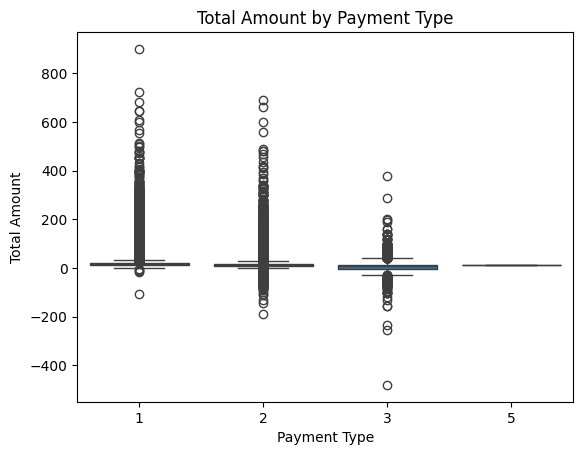

In [15]:
# see box chart behave normal without payment type 4
test_remove_payment_type_4 = df[df['payment_type'] != 4]
sns.boxplot(x='payment_type', y='total_amount', data=test_remove_payment_type_4)
plt.title('Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.show()

In [21]:
# print all instances where payment_type==4 and the total amount is over 1000
filtered_rows = df[(df['payment_type'] == 4) & (df['total_amount'] > 1000)]
print(filtered_rows)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
429859         1  2022-01-07 11:36:43   2022-01-07 11:47:12              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
429859            3.3         1.0                  N           107   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
429859           140             4    401092.32    2.5      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
429859           0.0                    0.3     401095.62   

        congestion_surcharge  airport_fee  
429859                   2.5          0.0  


**Answer(Part 2 of 3):** Above we see a normal box chart where the outlier does not skew the data. But we had to isolate the data from payment_type==4. We see that the normalized data amount is below 1000 for all other rows. Therefore, we look at only instances where payment_type==4 has a total_amount over $1,000.00.

From this we found that one row contains a fare amount of $401,092.32. This is the outlier that we are looking for. We then can determine whether this outlier is significant, or is a typo in the data.

Based on the other information in this row and comparing to the other rows with payment_type==4, this outlier appears to be a typo. We can then do one of two things. We can remove the row and rerun the data or we can average the data and insert the average farefee back into this row to clean up the outlier.

For this, I can see that there are over 1,000 instances of payment_amount == 4. And because this is only one row, I will remove this row from the dataframe and rerun the boxchart.

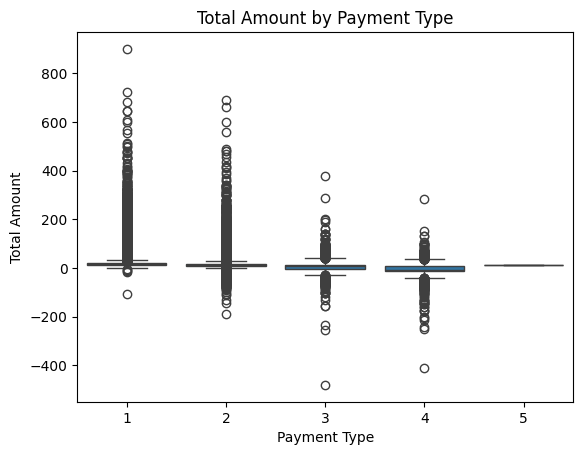

In [25]:
# Remove all rows where the payment_type == 4 and the total_amount > 1000.
remove_df_row = df[~((df['payment_type'] == 4) & (df['total_amount'] > 1000))]

test_remove_payment_type_4 = df[df['payment_type'] != 4]
sns.boxplot(x='payment_type', y='total_amount', data=remove_df_row)
plt.title('Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.show()

**Answer(Part 3 of 3):** Now the data has been normalized. We can clearly see the boxcharts without the outliers in payment_type ==4 that was skewing the results of our data.

Add `%load_ext cudf.pandas` before importing pandas to speed up operations using GPU




A histogram is a graphical representation that displays the distribution of a continuous or discrete numerical variable. It provides insights into the underlying data distribution and helps uncover patterns, frequencies, and ranges within the dataset. Here are some key uses and benefits of histogram plots:

  - Data Distribution: Histograms allow analysts to visualize the shape, central tendency, and spread of the data. They provide an overview of the data distribution, helping to identify if it follows a particular pattern, such as a normal distribution, skewed distribution, bimodal distribution, or multimodal distribution. Understanding the data distribution aids in selecting appropriate analysis techniques and understanding the characteristics of the data.

  - Frequency Analysis: Histograms display the frequency or count of data points within predefined bins or intervals along the x-axis. By observing the height or count of each bin, analysts can identify the frequency of occurrence for different values or value ranges. This information helps assess the concentration of data points and identify peaks or modes in the distribution.

  - Outlier Detection: Histograms can assist in identifying outliers, which are data points that significantly deviate from the rest of the distribution. Outliers may indicate data errors, unusual observations, or important anomalies requiring further investigation. By examining the tails or extreme values in the histogram, analysts can identify potential outliers that may require additional scrutiny.

  - Data Range and Spread: Histograms provide insights into the range and spread of the data. The x-axis represents the variable's values, while the y-axis represents the frequency or count of occurrences. By observing the width and span of the histogram, analysts can assess the data's range and variability. This information helps understand the data's spread and aids in subsequent analysis or decision-making processes.

  - Feature Engineering: Histograms can guide feature engineering processes by informing appropriate transformations, binning strategies, or encoding techniques for numerical variables. They assist in identifying nonlinear relationships or determining optimal cut-off points for converting continuous variables into categorical ones. Histograms also help identify data skewness and guide transformation methods to address the skew if necessary.

  - Data Quality Inspection: Histograms can be useful in detecting data quality issues or anomalies. Unusual spikes, gaps, or unexpected patterns in the histogram may indicate data entry errors, measurement inconsistencies, or missing data. By observing the histogram, analysts can identify potential data quality issues that require further investigation or preprocessing.

Your task is:

  1. Use Seaborn's [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to explore the data distributions for fare_amount, trip_distance, and extra. Use kernel density estimators to better visualize the distribution. Use sampling if you run into any memory issues.

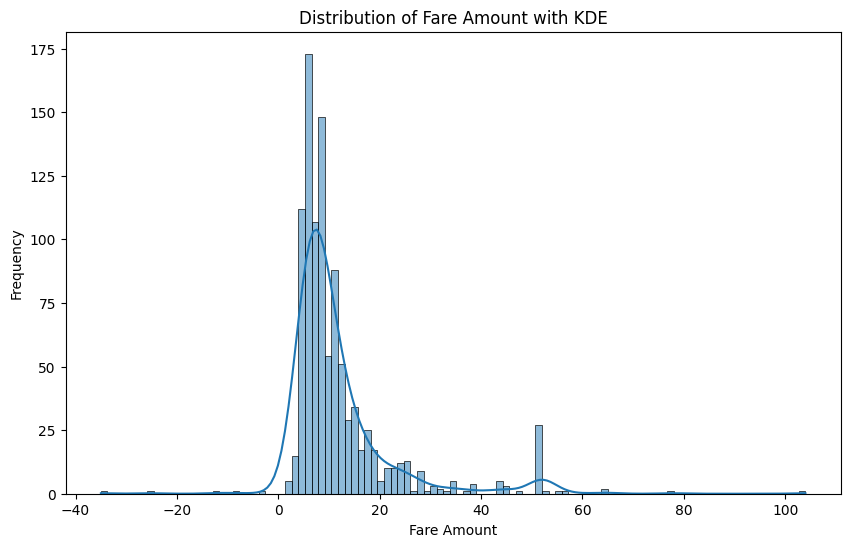

In [18]:
# Explore data distributions for 'fare_amount', 'trip_distance' and 'extra' using Seaborn's histplot. Sample the data if you run into memory issues.
# Fare Amount Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'].sample(1000), kde=True)
plt.title('Distribution of Fare Amount with KDE')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()



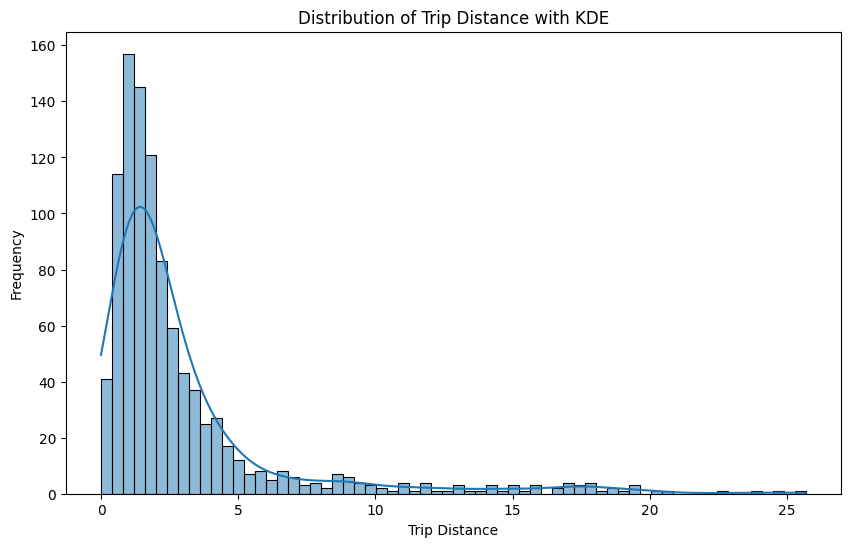

In [19]:
# Trip Distance Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'].sample(1000), kde=True)
plt.title('Distribution of Trip Distance with KDE')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()


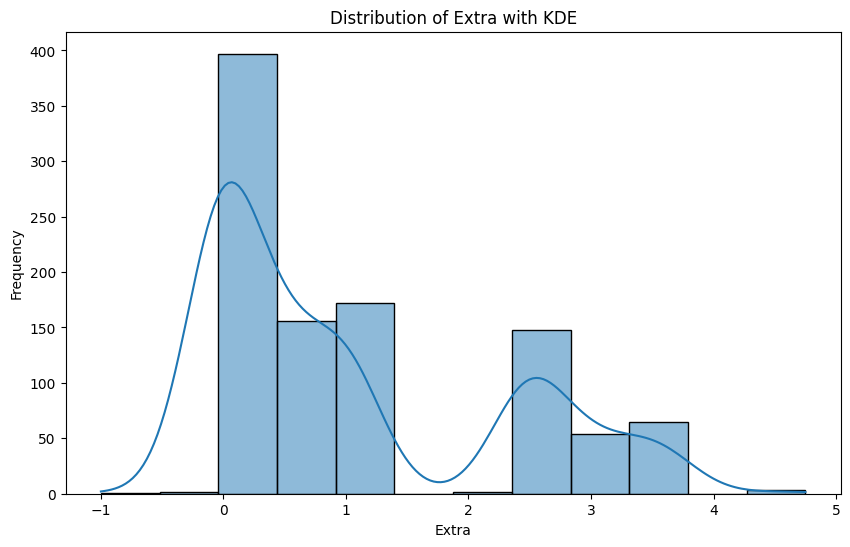

In [20]:
# Extra Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['extra'].sample(1000), kde=True)
plt.title('Distribution of Extra with KDE')
plt.xlabel('Extra')
plt.ylabel('Frequency')
plt.show()

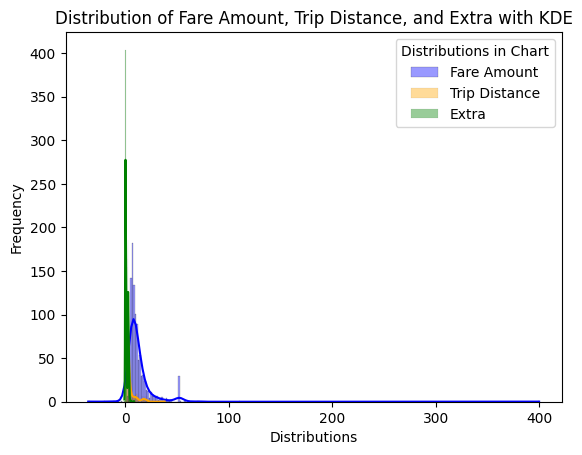

In [21]:
# Fair Amount, Trip Distance and Extra Histogram
sns.histplot(df['fare_amount'].sample(1000), kde=True, color='blue', label='Fare Amount', alpha=0.4)
sns.histplot(df['trip_distance'].sample(1000), kde=True, color='orange', label='Trip Distance', alpha=0.4)
sns.histplot(df['extra'].sample(1000), kde=True, color='green', label='Extra', alpha=0.4)
plt.legend(title='Distributions in Chart', loc='upper right')
plt.title('Distribution of Fare Amount, Trip Distance, and Extra with KDE')
plt.xlabel('Distributions')
plt.ylabel('Frequency')
plt.show()